In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [10]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\BR\healthcare_dataset.csv")

In [11]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,10/9/2022,Penicillin,Abnormal


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [17]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224655,202.000000
50%,52.000000,25538.069380,302.000000
75%,68.000000,37820.508432,401.000000
max,89.000000,52764.276740,500.000000


In [ ]:
##1. **What is the distribution of patients by gender in the dataset?**

In [19]:
df["Gender"].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [ ]:
##2. **Which medical condition is the most common among patients?**

In [25]:
df['Medical Condition'].value_counts().idxmax()

'Arthritis'

In [27]:
##3. **How does the average billing amount vary across different insurance providers?**

In [45]:
insurance_billing_inxe_diff = df.groupby('Insurance Provider')["Billing Amount"].mean().reset_index()
insurance_billing_inxe_diff

,Insurance Provider,Billing Amount
0,Aetna,25553.294506
1,Blue Cross,25613.011503
2,Cigna,25525.766314
3,Medicare,25615.990508
4,UnitedHealthcare,25389.172390


In [47]:
##4. **Which admission type (Urgent, Emergency, Elective) is most frequently observed?**  

In [53]:
df['Admission Type'].value_counts().idxmax()

'Elective'

In [ ]:
##5. **What is the average length of hospital stay (discharge date - admission date) for each medical condition?**  

In [61]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [63]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [65]:
df["Duration_days"] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [72]:
df.groupby("Medical Condition")["Duration_days"].mean().reset_index()

,Medical Condition,Duration_days
0,Arthritis,15.517404
1,Asthma,15.696570
2,Cancer,15.495827
3,Diabetes,15.422936
4,Hypertension,15.458626
5,Obesity,15.464305


In [74]:
##6. **Which blood type is most prevalent among patients with cancer?** 

In [80]:
cancer_patients_blood_group = df[df["Medical Condition"] == "Cancer"].groupby("Blood Type")["Name"].count().idxmax()
cancer_patients_blood_group

'AB-'

In [ ]:
##**How does the billing amount correlate with the duration of hospital stay?** 

In [84]:
df['Billing Amount'].corr(df['Duration_days'])

-0.005601669976154806

In [86]:
"""I'll conduct more analysis"""

"I'll conduct more analysis"

In [88]:
##**Which doctors have the highest number of patients under their care?**

In [96]:
df.groupby("Doctor")["Name"].count().sort_values(ascending = False).head(20)

Doctor
Michael Smith        27
Robert Smith         22
John Smith           22
Michael Johnson      20
James Smith          20
David Smith          19
Robert Johnson       19
Michael Williams     18
Christopher Smith    17
John Johnson         17
Matthew Smith        17
Michael Brown        16
Jennifer Johnson     15
Christopher Brown    15
William Johnson      15
David Johnson        15
Elizabeth Smith      15
Daniel Smith         15
Anthony Smith        14
Lisa Smith           14
Name: Name, dtype: int64

In [ ]:
##9. **What is the most prescribed medication for patients with hypertension?**

In [104]:
df[df['Medical Condition'] == 'Hypertension'].groupby("Medication")["Name"].count().idxmax()

'Ibuprofen'

In [ ]:
##10. **How do test results (Normal, Abnormal, Inconclusive) vary across different medical conditions?** 

In [116]:
test_results_by_condition = df.groupby(['Medical Condition', 'Test Results']).size().unstack(fill_value=0)
test_results_by_condition

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,3188,3088,3032
Asthma,3009,3029,3147
Cancer,3118,3060,3049
Diabetes,3168,3046,3090
Hypertension,3012,3091,3142
Obesity,3132,3042,3057


In [ ]:
##11. **Which hospitals have the highest average billing amounts?**

In [126]:
df.groupby("Hospital")['Billing Amount'].mean().sort_values(ascending = False).head(20)

Hospital
Hernandez-Morton                  52373.03237
Walker-Garcia                     52170.03685
Ruiz-Anthony                      52154.23772
George-Gonzalez                   52102.24089
Rocha-Carter                      52092.66990
Briggs Walker Martinez, and       52024.72644
and Small Stephens Harrington,    51975.96814
Clark-Espinoza                    51848.20160
Pierce and Miller James,          51722.12274
Stephens Ltd                      51714.30087
Lester-Park                       51661.01203
Stein-Watts                       51634.09984
Thomas, Clark and Keith           51633.85843
Baker, Weber Patton and           51587.93682
Bowman-Jimenez                    51567.27767
Perez-Wagner                      51531.96456
Brewer-Washington                 51415.25787
Cabrera-Baker                     51350.51281
Santiago and Russo, Wood          51336.22121
Group Glover                      51316.62126
Name: Billing Amount, dtype: float64

In [128]:
##12. **What is the age distribution of patients with diabetes?**  

In [140]:
df[df["Medical Condition"] == "Diabetes"].groupby("Age")["Name"].count().reset_index(name = "Count_of_patients")

,Age,Count_of_patients
0,14,2
1,15,6
2,16,4
3,17,4
4,18,124
...,...,...
71,85,110
72,86,5
73,87,10
74,88,4


In [142]:
##14. **Which insurance provider covers the highest number of patients?**  

In [148]:
df['Insurance Provider'].value_counts().idxmax()

'Cigna'

In [ ]:
##15. **How does the billing amount differ between patients with normal and abnormal test results?**  

In [156]:
billing_on_test_result = df.groupby("Test Results")["Billing Amount"].mean()

In [162]:
billing_on_test_result[['Abnormal', 'Normal']].reset_index()

,Test Results,Billing Amount
0,Abnormal,25538.353552
1,Normal,25456.647191


In [164]:
##16. **What is the most common room number assigned to patients?** 

In [180]:
rooms_assigned  = df['Room Number'].value_counts().reset_index(name ="No of times Assigned").sort_values(by = "No of times Assigned")

In [184]:
rooms_assigned.iloc[0]

Room Number             398
No of times Assigned    109
Name: 399, dtype: int64

In [186]:
##17. **Which medical condition has the highest variability in billing amounts?** 

In [192]:
df.groupby('Medical Condition')['Billing Amount'].std().sort_values(ascending=False).idxmax()

'Hypertension'

In [ ]:
##18. **How does the distribution of medical conditions differ between male and female patients?**  

In [216]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [218]:
condition_by_gender = pd.crosstab(df['Gender'], df['Medical Condition'])
condition_by_gender

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,4686,4553,4602,4651,4612,4622
Male,4622,4632,4625,4653,4633,4609


In [222]:
normalized = pd.crosstab(df['Gender'], df['Medical Condition'], normalize='index') * 100
normalized.round(2)

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,16.90,16.42,16.60,16.77,16.63,16.67
Male,16.64,16.68,16.65,16.75,16.68,16.59


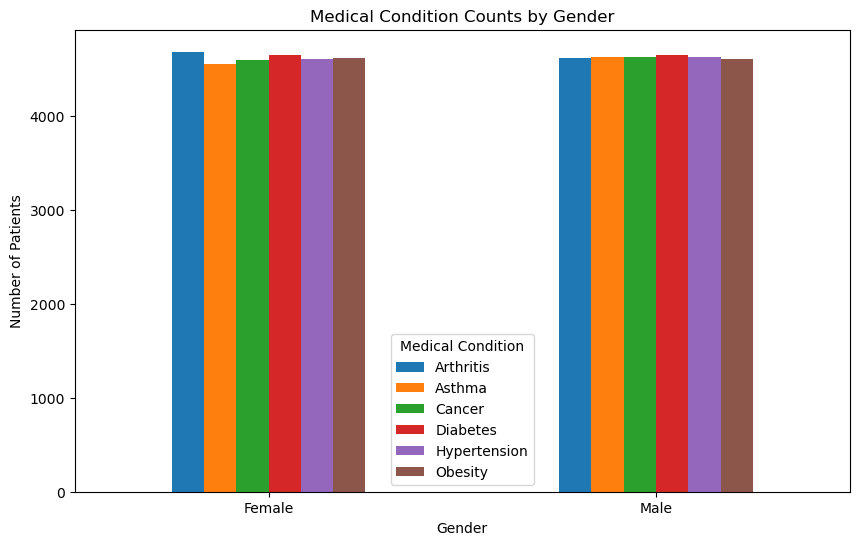

In [224]:
condition_by_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Medical Condition Counts by Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

In [ ]:
##19. **Are there any outliers in the billing amount column?** 

In [204]:
print(df['Billing Amount'].describe())

count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224655
50%      25538.069380
75%      37820.508432
max      52764.276740
Name: Billing Amount, dtype: float64


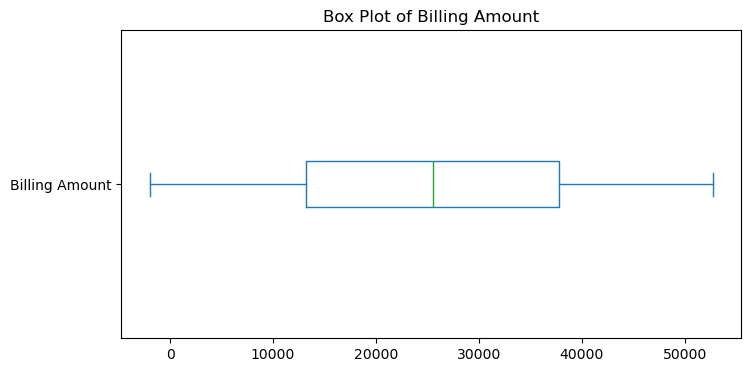

In [206]:
plt.figure(figsize=(8, 4))
df['Billing Amount'].plot(kind='box', vert=False)
plt.title('Box Plot of Billing Amount')
plt.show()

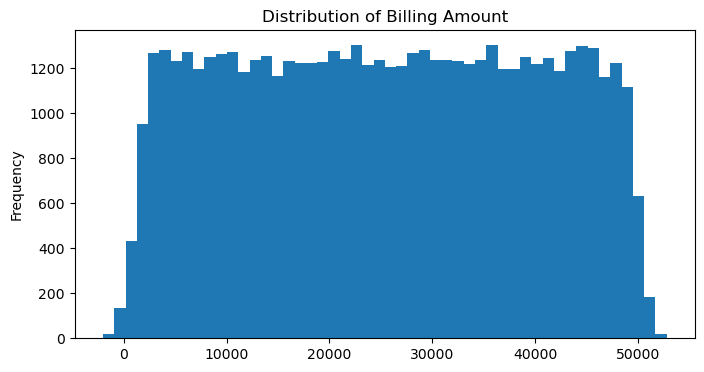

In [208]:
plt.figure(figsize=(8, 4))
df['Billing Amount'].plot(kind='hist', bins=50)
plt.title('Distribution of Billing Amount')
plt.show()

In [210]:
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Billing Amount'] < lower_bound) | (df['Billing Amount'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers[['Name', 'Billing Amount', 'Medical Condition']])

Number of outliers: 0
Empty DataFrame
Columns: [Name, Billing Amount, Medical Condition]
Index: []


In [194]:
##20. **What is the relationship between age and the likelihood of having a specific medical condition?**  

In [198]:
avg_age = df.groupby('Medical Condition')['Age'].mean().sort_values()
avg_age

Medical Condition
Obesity         51.240277
Diabetes        51.554170
Cancer          51.558795
Arthritis       51.565320
Asthma          51.575830
Hypertension    51.741915
Name: Age, dtype: float64

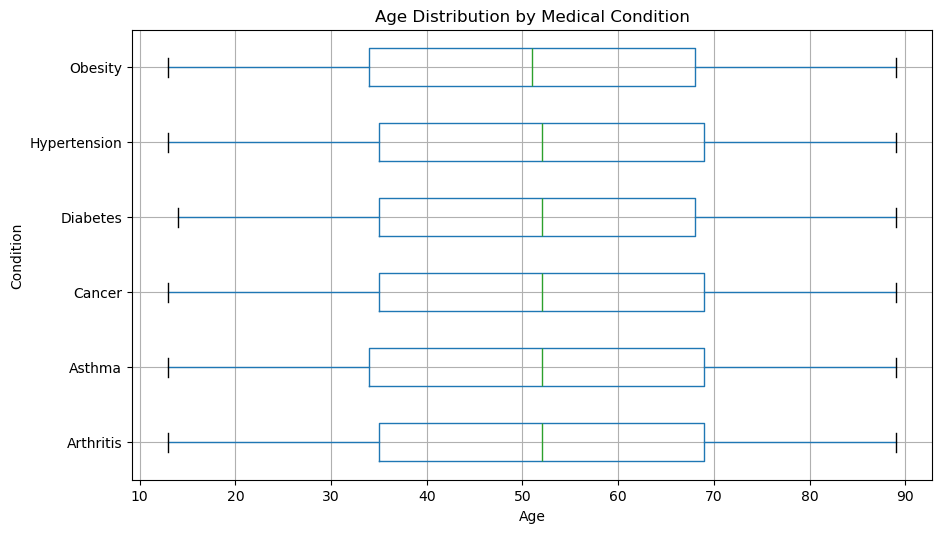

In [200]:
df.boxplot(column='Age', by='Medical Condition', figsize=(10, 6), vert=False)
plt.title('Age Distribution by Medical Condition')
plt.xlabel('Age')
plt.ylabel('Condition')
plt.suptitle('')
plt.show()

In [202]:
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
condition_by_age = pd.crosstab(df['Age Group'], df['Medical Condition'], normalize='index') * 100
print(condition_by_age.round(2))

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Age Group                                                                    
<30                    16.48   16.63   16.92     16.48         16.43    17.07
30-40                  17.27   16.71   16.44     16.69         16.62    16.27
40-50                  16.81   16.37   16.24     17.24         16.51    16.84
50-60                  16.89   15.79   16.80     16.68         16.73    17.11
60-70                  16.19   16.76   16.35     17.70         16.42    16.59
70-80                  16.95   16.92   16.82     16.29         17.22    15.79
80+                    17.05   16.75   16.83     15.91         16.85    16.60
